# Ejercicio 9: Linear regression

In [1]:
def import_csv(file):
    import pandas as pd
    return pd.read_csv(file)

In [11]:
path = "../Datos/Terminos_lagoon_TA_DIC_2023_RawData.csv"

data_frame = import_csv(path)


#### A. Regresión linear de salinidad vs temperatura

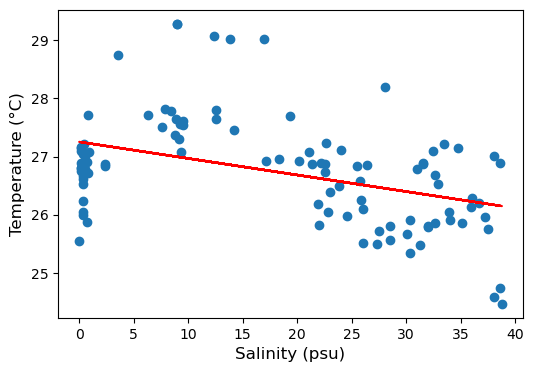

Slope: -0.028458717486946162


In [8]:
import matplotlib.pyplot as plt
from scipy import stats

x = data_frame['sal_psu']
y = data_frame['temp_c']

plt.scatter(x, y, label='original data')

plt.xlabel('Salinity (psu)', fontsize = 12, )
plt.ylabel('Temperature (°C)', fontsize = 12)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)


plt.plot(x, intercept + slope*x, 'r', label='fitted line')

plt.gcf().set_size_inches(6, 4)

plt.show()

print('Slope:', slope)


In [9]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.17749929096684752
p_value: 6.879907520531154e-06
slope: -0.028458717486946162
intercept: 27.25200067150795


#### OLS de salinidad vs temperatura

In [10]:
import statsmodels.api as sm
import numpy as np

x = data_frame['sal_psu']
y = data_frame['temp_c']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 temp_c   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     22.44
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           6.88e-06
Time:                        14:50:54   Log-Likelihood:                -130.39
No. Observations:                 106   AIC:                             264.8
Df Residuals:                     104   BIC:                             270.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.2520      0.132    206.412      0.0

In [7]:
print("\n=== MODEL INTERPRETATION ===\n")


r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")


slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")


print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.177
❌ Weak model fit: Explains little variance. Review your model.

Coefficients:
- const: Coef = 27.2520, p = 0.0000 → ✔️ Significant (p < 0.05)
- sal_psu: Coef = -0.0285, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (sal_psu): -0.0285, p = 0.0000 → ✔️ Significant

Standard Error of the model: 0.8359


#### B. Regresión linear DIC vs salinidad

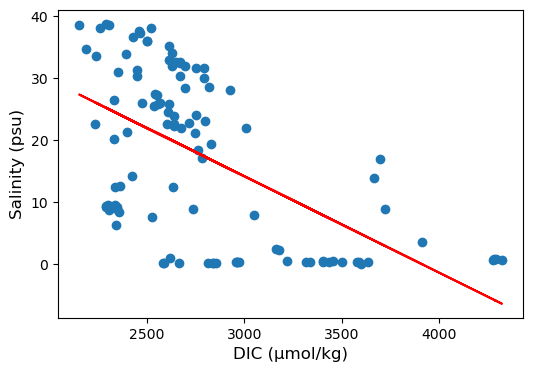

Slope: -0.015537057058518267


In [12]:
import matplotlib.pyplot as plt
from scipy import stats

x = data_frame['dic_micromol_kg']
y = data_frame['sal_psu']

plt.scatter(x, y, label='original data')

plt.xlabel('DIC (μmol/kg)', fontsize = 12, )
plt.ylabel('Salinity (psu)', fontsize = 12)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)


plt.plot(x, intercept + slope*x, 'r', label='fitted line')

plt.gcf().set_size_inches(6, 4)

plt.show()

print('Slope:', slope)

In [13]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.32710473310227767
p_value: 1.51441040237653e-10
slope: -0.015537057058518267
intercept: 60.80437362978961


#### OLS de DIC vs salinidad

In [14]:
import statsmodels.api as sm
import numpy as np

x = data_frame['dic_micromol_kg']
y = data_frame['sal_psu']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                sal_psu   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     50.56
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           1.51e-10
Time:                        14:57:22   Log-Likelihood:                -405.41
No. Observations:                 106   AIC:                             814.8
Df Residuals:                     104   BIC:                             820.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              60.8044      6.210     

In [15]:
print("\n=== MODEL INTERPRETATION ===\n")


r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")


slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")


print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.327
❌ Weak model fit: Explains little variance. Review your model.

Coefficients:
- const: Coef = 60.8044, p = 0.0000 → ✔️ Significant (p < 0.05)
- dic_micromol_kg: Coef = -0.0155, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (dic_micromol_kg): -0.0155, p = 0.0000 → ✔️ Significant

Standard Error of the model: 11.1923
